In [5]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
# Specify the path to the CSV file
file_path = '.data/MKT_DATA_EVAL.csv'

# Read the CSV file and load it into a DataFrame
df = pd.read_csv(file_path)
df.columns

df.head()

,job_id,controller,runtime_secs,run_id,run_timestamp,end_timestamp,cpu_consumption,memory_consumption,threads,parallel_id
0,MKT_DATA_EVAL,ESX_INHOUSE,1333,5258b5d5-1f82-418a-b30b-35b37d9a61de,2024-01-02 08:00:00,2024-01-02 08:22:13,446.795296,168.646364,7,0
1,MKT_DATA_EVAL,ESX_INHOUSE,1313,ab3f24df-c345-4d8f-8174-01cab1e2a014,2024-01-02 08:00:00,2024-01-02 08:21:53,492.404253,172.892953,9,1
2,MKT_DATA_EVAL,ESX_INHOUSE,1319,679567d0-0dc7-40b0-8a4e-5ace425d143f,2024-01-02 08:00:00,2024-01-02 08:21:59,482.404165,83.377339,9,2
3,MKT_DATA_EVAL,ESX_INHOUSE,1351,aea0d39f-d9f1-4556-8b37-84f81ecc8626,2024-01-02 08:00:00,2024-01-02 08:22:31,502.418755,103.548245,9,3
4,MKT_DATA_EVAL,ESX_INHOUSE,1328,f9e0cd04-e434-4c0e-bb08-60c1dd8ae4d4,2024-01-02 08:00:00,2024-01-02 08:22:08,492.713340,152.650821,8,4


In [8]:
# Convert 'run_timestamp' to datetime
df['run_timestamp'] = pd.to_datetime(df['run_timestamp'])

# Set 'run_timestamp' as index
df.set_index('run_timestamp', inplace=True)


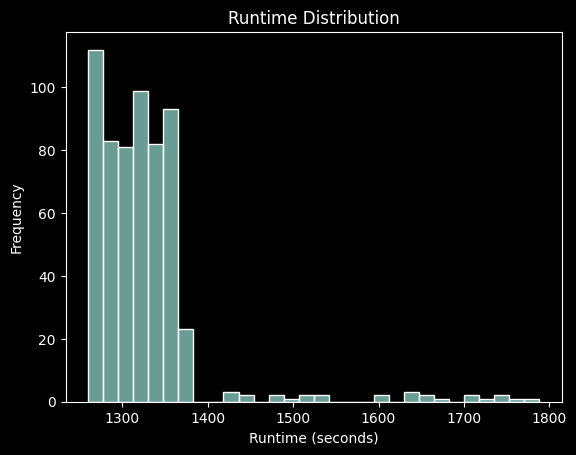

In [9]:
sns.histplot(df['runtime_secs'], kde=False, bins=30)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Frequency')
plt.show()

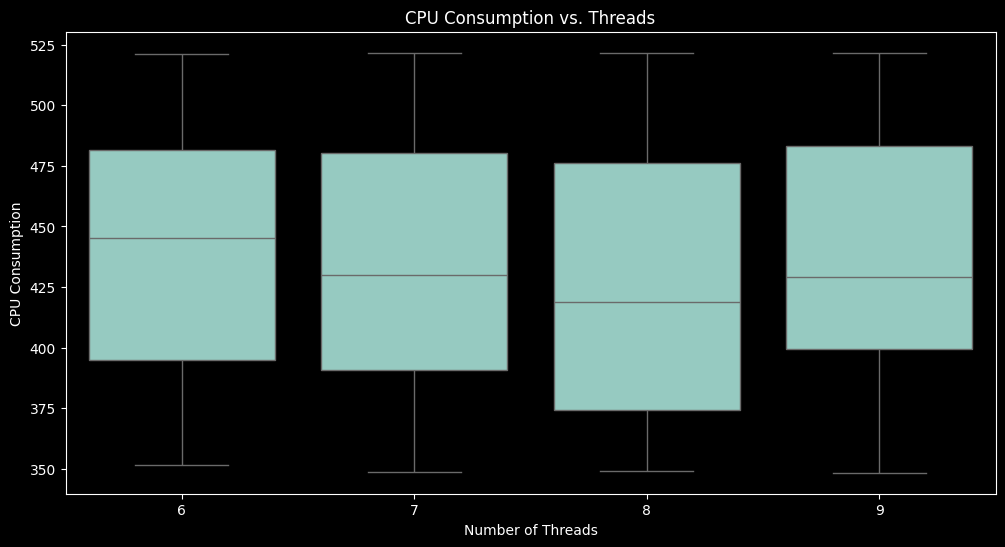

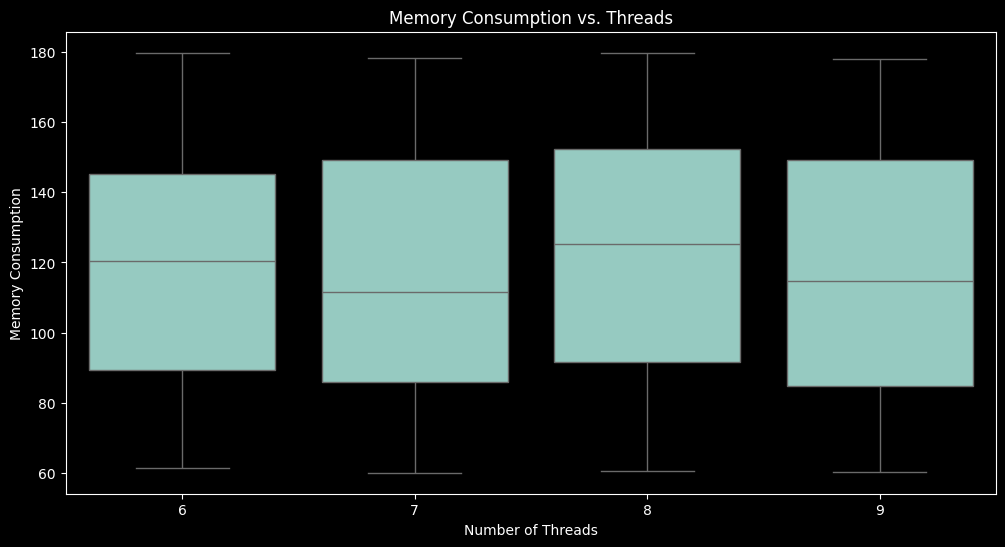

In [13]:
# Preparing data for the scatter plots
parallelism_data = df[['threads', 'runtime_secs', 'cpu_consumption', 'memory_consumption']]

# Creating box plot for CPU Consumption vs. Threads
plt.figure(figsize=(12, 6))
sns.boxplot(data=parallelism_data, x="threads", y="cpu_consumption")
plt.title("CPU Consumption vs. Threads")
plt.xlabel("Number of Threads")
plt.ylabel("CPU Consumption")
plt.show()

# Creating box plot for Memory Consumption vs. Threads
plt.figure(figsize=(12, 6))
sns.boxplot(data=parallelism_data, x="threads", y="memory_consumption")
plt.title("Memory Consumption vs. Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Memory Consumption")
plt.show()


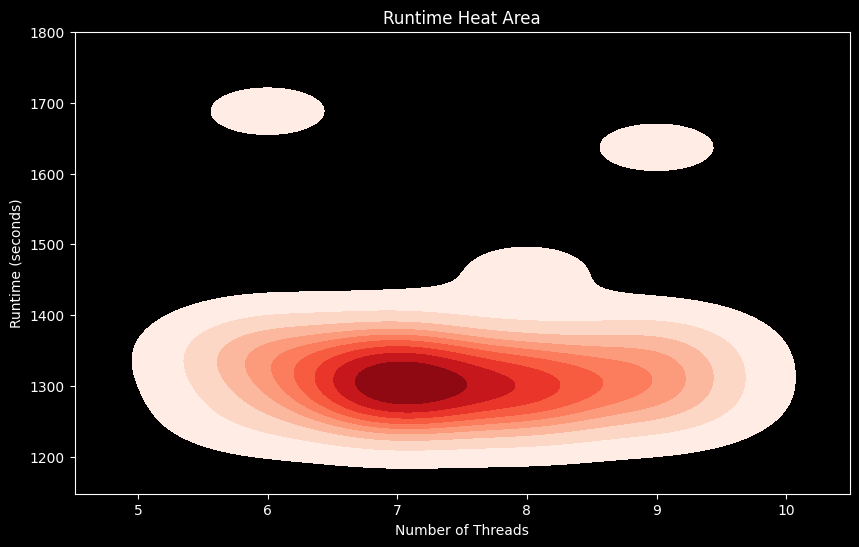

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=parallelism_data, x="threads", y="runtime_secs", cmap="Reds", fill=True)

plt.title('Runtime Heat Area')
plt.xlabel('Number of Threads')
plt.ylabel('Runtime (seconds)')

plt.show()